In [1328]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [1329]:
data = pd.read_csv("C:/data sets/cardata.csv")

In [1330]:
df=pd.DataFrame(data)
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [1331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 16.5+ KB


In [1332]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [1333]:
df.drop(['Car_Name'],axis=1,inplace = True)

In [1334]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [1335]:
df.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [1336]:
df.Seller_Type.value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [1337]:
df.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [1338]:
df = pd.get_dummies(df,columns=['Fuel_Type','Seller_Type','Transmission'],drop_first=True)

In [1339]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    301 non-null    int64  
 1   Selling_Price           301 non-null    float64
 2   Present_Price           301 non-null    float64
 3   Kms_Driven              301 non-null    int64  
 4   Owner                   301 non-null    int64  
 5   Fuel_Type_Diesel        301 non-null    uint8  
 6   Fuel_Type_Petrol        301 non-null    uint8  
 7   Seller_Type_Individual  301 non-null    uint8  
 8   Transmission_Manual     301 non-null    uint8  
dtypes: float64(2), int64(3), uint8(4)
memory usage: 13.0 KB


In [1340]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,1,0,1
1,2013,4.75,9.54,43000,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,1,0,1
3,2011,2.85,4.15,5200,0,0,1,0,1
4,2014,4.60,6.87,42450,0,1,0,0,1


In [1341]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189,0.199336,0.794020,0.352159,0.867110
std,2.891554,5.082812,8.644115,38886.883882,0.247915,0.400166,0.405089,0.478439,0.340021
min,2003.000000,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [1342]:
df['current year']=max(df['Year']+1)

In [1343]:
df['age']=df['current year']-df['Year']

In [1344]:
df.drop(['current year','Year'],axis=1,inplace=True)

In [1345]:
df.head(5)

,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,age
0,3.35,5.59,27000,0,0,1,0,1,5
1,4.75,9.54,43000,0,1,0,0,1,6
2,7.25,9.85,6900,0,0,1,0,1,2
3,2.85,4.15,5200,0,0,1,0,1,8
4,4.60,6.87,42450,0,1,0,0,1,5


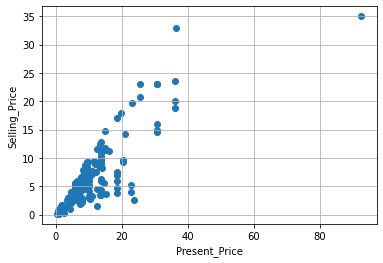

In [1346]:
plt.scatter(df['Present_Price'],df['Selling_Price'])

plt.xlabel('Present_Price')
plt.ylabel('Selling_Price')
plt.grid()
plt.show()

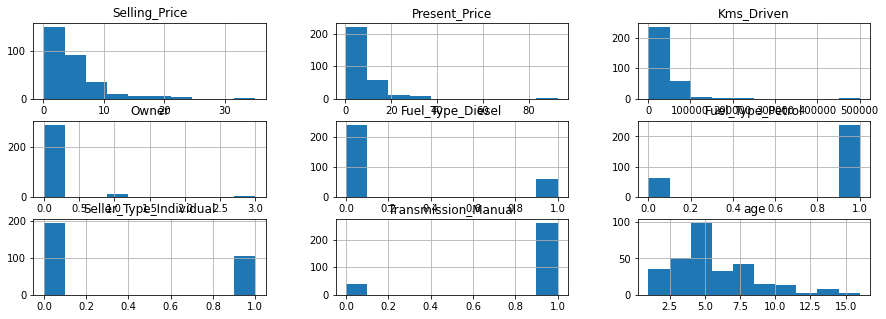

In [1347]:
df.hist(figsize=(15,5))
plt.show()

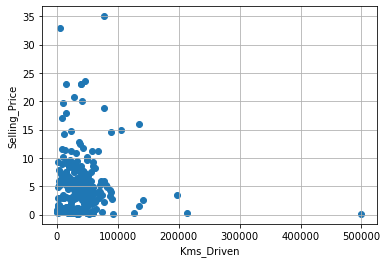

In [1348]:
plt.scatter(df['Kms_Driven'],df['Selling_Price'])

plt.xlabel('Kms_Driven')
plt.ylabel('Selling_Price')
plt.grid()
plt.show()

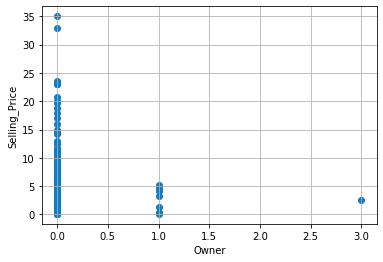

In [1349]:

plt.scatter(df['Owner'],df['Selling_Price'])

plt.xlabel('Owner')
plt.ylabel('Selling_Price')
plt.grid()
plt.show()

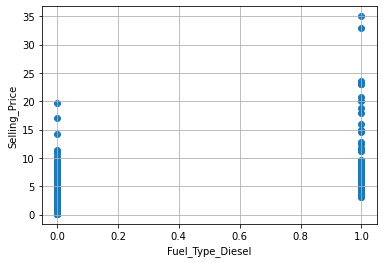

In [1350]:
plt.scatter(df['Fuel_Type_Diesel'],df['Selling_Price'])

plt.xlabel('Fuel_Type_Diesel')
plt.ylabel('Selling_Price')
plt.grid()
plt.show()

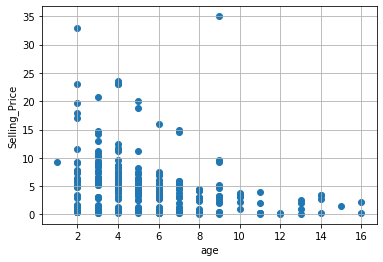

In [1351]:
plt.scatter(df['age'],df['Selling_Price'])

plt.xlabel('age')
plt.ylabel('Selling_Price')
plt.grid()
plt.show()

In [1352]:
#####The target variable Selling Price is highly correlated with: Present Price -Fuel Type-Seller Type

In [1353]:
dfb=df ###save an unnormalized version of df

In [1354]:
####normalizing
from sklearn import preprocessing

In [1355]:
Scaler= preprocessing.MinMaxScaler(feature_range=(0,1))
Norm1=Scaler.fit_transform(df)
Norm1_df=pd.DataFrame(Norm1,columns=['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual', 'age'])

In [1356]:
dfb=Norm1_df

In [1357]:
dfb.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,age
0,0.093123,0.057109,0.053053,0.0,0.0,1.0,0.0,1.0,0.266667
1,0.133238,0.099913,0.085085,0.0,1.0,0.0,0.0,1.0,0.333333
2,0.204871,0.103273,0.012813,0.0,0.0,1.0,0.0,1.0,0.066667
3,0.078797,0.041504,0.009409,0.0,0.0,1.0,0.0,1.0,0.466667
4,0.128940,0.070980,0.083984,0.0,1.0,0.0,0.0,1.0,0.266667


In [1358]:
#1=Scaler.inverse_transform(dfb)
#1_df=pd.DataFrame(m1,columns=['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner',
  #    'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
   #   'Transmission_Manual', 'age'])
#1_df

In [1359]:
#### Correlation
comp1= np.corrcoef(dfb.Present_Price , dfb.Selling_Price)
comp1

array([[1.        , 0.87898255],
       [0.87898255, 1.        ]])

In [1360]:
comp2= np.corrcoef(dfb.Kms_Driven , dfb.Selling_Price)
comp2

array([[1.        , 0.02918709],
       [0.02918709, 1.        ]])

In [1361]:
comp3= np.corrcoef(dfb.Owner , dfb.Selling_Price)
comp3

array([[ 1.       , -0.0883441],
       [-0.0883441,  1.       ]])

In [1362]:
comp4= np.corrcoef(dfb.Fuel_Type_Diesel , dfb.Selling_Price)
comp4

array([[1.        , 0.55233929],
       [0.55233929, 1.        ]])

In [1363]:
comp5= np.corrcoef(dfb.Fuel_Type_Petrol , dfb.Selling_Price)
comp5

array([[ 1.        , -0.54057108],
       [-0.54057108,  1.        ]])

In [1364]:
comp6= np.corrcoef(dfb.Seller_Type_Individual , dfb.Selling_Price)
comp6

array([[ 1.        , -0.55072376],
       [-0.55072376,  1.        ]])

In [1365]:
comp7= np.corrcoef(dfb.Transmission_Manual , dfb.Selling_Price)
comp7

array([[ 1.        , -0.36712763],
       [-0.36712763,  1.        ]])

In [1366]:
comp8= np.corrcoef(dfb.age, dfb.Selling_Price)
comp8

array([[ 1.        , -0.23614098],
       [-0.23614098,  1.        ]])

In [1367]:
#####The target variable Selling Price is highly correlated with: Present Price -Fuel Type-Seller Type

<AxesSubplot:>

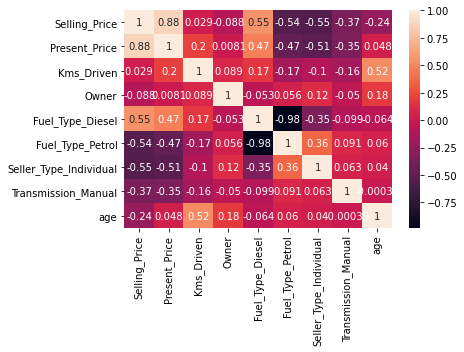

In [1368]:
sns.heatmap(dfb.corr(), annot=True)

In [1369]:
   #########building model

X = dfb.drop(['Selling_Price'],axis=1)
y=dfb['Selling_Price'].values.reshape(-1,1)

In [1370]:
X_train , X_test , y_train , y_test=train_test_split(X,y,test_size=0.2 , random_state=0)

In [1371]:
regressor=LinearRegression()
regressor.fit(X_train , y_train)

LinearRegression()

In [1372]:
y_pred= regressor.predict(X_test)

In [1373]:
print(regressor.intercept_)
print(regressor.coef_)

[0.11494123]
[[ 1.12766502 -0.08793875 -0.08110965  0.07142358  0.01672179 -0.03269047
  -0.04113497 -0.16466823]]


In [1374]:
X_test

,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,age
223,0.098396,0.121884,0.000000,1.0,0.0,0.0,1.0,0.200000
150,0.005483,0.011011,0.000000,0.0,1.0,1.0,1.0,0.466667
226,0.058301,0.048404,0.000000,0.0,1.0,0.0,1.0,0.200000
296,0.122237,0.067043,0.000000,1.0,0.0,0.0,1.0,0.133333
52,0.210772,0.029029,0.000000,1.0,0.0,0.0,0.0,0.066667
...,...,...,...,...,...,...,...,...
137,0.005061,0.031031,0.000000,0.0,1.0,1.0,1.0,0.333333
227,0.044538,0.113113,0.000000,0.0,1.0,0.0,1.0,0.466667
26,0.060143,0.109385,0.000000,0.0,1.0,0.0,1.0,0.333333
106,0.033919,0.032032,0.333333,0.0,1.0,1.0,1.0,0.266667


In [1375]:
X_test.insert(8,"y_test",y_test)
X_test.insert(9,"y_pred",y_pred)
X_test

,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,age,y_test,y_pred
223,0.098396,0.121884,0.000000,1.0,0.0,0.0,1.0,0.200000,0.233524,0.212536
150,0.005483,0.011011,0.000000,0.0,1.0,1.0,1.0,0.466667,0.011461,-0.013793
226,0.058301,0.048404,0.000000,0.0,1.0,0.0,1.0,0.200000,0.147564,0.119082
296,0.122237,0.067043,0.000000,1.0,0.0,0.0,1.0,0.133333,0.269341,0.255220
52,0.210772,0.029029,0.000000,1.0,0.0,0.0,0.0,0.066667,0.512894,0.410514
...,...,...,...,...,...,...,...,...,...,...
137,0.005061,0.031031,0.000000,0.0,1.0,1.0,1.0,0.333333,0.015759,0.005926
227,0.044538,0.113113,0.000000,0.0,1.0,0.0,1.0,0.466667,0.070201,0.053960
26,0.060143,0.109385,0.000000,0.0,1.0,0.0,1.0,0.333333,0.116046,0.093841
106,0.033919,0.032032,0.333333,0.0,1.0,1.0,1.0,0.266667,0.035817,0.022321


In [1376]:
df3=X_test.sort_values(by=['age'])

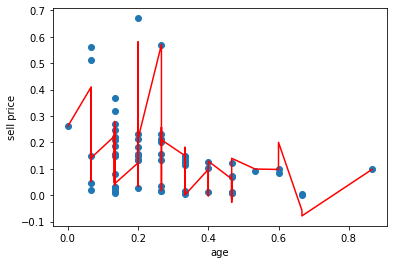

In [1377]:
a=df3.age
b=df3.y_test
c=df3.age
d=df3.y_pred
plt.xlabel("age")
plt.ylabel("sell price")
plt.scatter(a,b)
plt.plot(c,d,color='red')
plt.show()

In [1378]:
df3=X_test.sort_values(by=['Present_Price'])

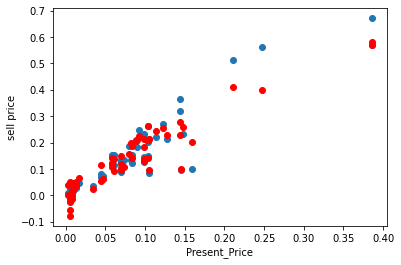

In [1379]:
a=df3.Present_Price
b=df3.y_test
c=df3.Present_Price
d=df3.y_pred
plt.xlabel("Present_Price")
plt.ylabel("sell price")
plt.scatter(a,b)
plt.scatter(c,d,color='red')
plt.show()

In [1380]:
    #####comparing the actual and predicted
Compare = pd.DataFrame({'Actual':y_test.flatten(),'predicted':y_pred.flatten()})
Compare

,Actual,predicted
0,0.233524,0.212536
1,0.011461,-0.013793
2,0.147564,0.119082
3,0.269341,0.255220
4,0.512894,0.410514
...,...,...
56,0.015759,0.005926
57,0.070201,0.053960
58,0.116046,0.093841
59,0.035817,0.022321


Text(0, 0.5, 'prediction')

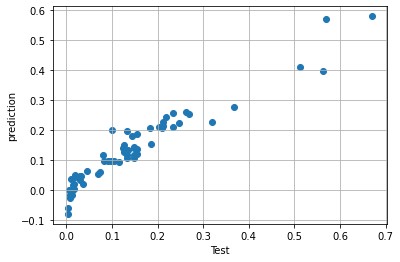

In [1381]:
#####comparing the actual and predicted by a plot
plt.scatter(y_test,y_pred)
plt.grid()
plt.xlabel("Test")
plt.ylabel("prediction")

In [1382]:
#### using metrics 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score:', metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 0.02847493807086095
Mean Squared Error: 0.001775742011795965
Root Mean Squared Error: 0.04213955400566035
r2_score: 0.9144342972228514


In [1383]:
### creating a DataFrame from user inputs
ddf = pd.DataFrame(columns=['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual', 'age'])
entry = int(input("please press 1 to continue:"))

for _ in range(entry):
    P=float(input("Enter Present_Price: "))
    K=float(input("Enter Kms_Driven: "))
    O=float(input("Enter Owner: "))
    Diesel=float(input("Enter Fuel_Type_Diesel: "))
    Petrol=float(input("Enter Fuel_Type_Petrol: "))
    S=float(input("Enter Seller_Type_Individual: "))
    T=float(input("Enter Transmission_Manual: "))
    g=float(input("Enter age: "))

         
    df1 = pd.DataFrame(data=[[P,K, O , Diesel , Petrol,
S ,T , g]],columns=[ 'Present_Price', 'Kms_Driven', 'Owner',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual', 'age'])
    ddf = pd.concat([ddf,df1], axis=0)

ddf.index = range(len(ddf.index))
print (ddf)


please press 1 to continue:1
Enter Present_Price: 1
Enter Kms_Driven: 1
Enter Owner: 1
Enter Fuel_Type_Diesel: 1
Enter Fuel_Type_Petrol: 1
Enter Seller_Type_Individual: 1
Enter Transmission_Manual: 1
Enter age: 1
  Selling_Price  Present_Price  Kms_Driven  Owner  Fuel_Type_Diesel  \
0           NaN            1.0         1.0    1.0               1.0   

   Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  age  
0               1.0                     1.0                  1.0  1.0  


In [1384]:

### pred_val function will take user input and scale it and then return the output in unscaled format

#Scaling 
from sklearn import preprocessing

transformer_x = preprocessing.MinMaxScaler().fit(X)
transformer_y = preprocessing.MinMaxScaler().fit(y) 
def pred_val(X1,X2,X3,X4,X5,X6,X7,X8):
    X_scaled2 = transformer_x.transform(np.array([[X1,X2,X3,X4,X5,X6,X7,X8]]))
    print("X_test scaled is:",X_scaled2)
    #Intercept
    inv_int2 = transformer_y.inverse_transform(regressor.intercept_.reshape(-1, 1))[0][0]
    
    #Coefficient
    inv_coef2 = transformer_x.inverse_transform(regressor.coef_.reshape(1,-1))[0]
    #Prediction 
    preds_inner = regressor.predict(X_scaled2)  
    final_pred = transformer_y.inverse_transform(preds_inner.reshape(-1, 1))[0][0]
    print("final_prediction is :" ,final_pred)
pred_val(P,K, O , Diesel , Petrol,S ,T , g)   

X_test scaled is: [[1. 1. 1. 1. 1. 1. 1. 1.]]
final_prediction is : 0.9232095407670564


In [1385]:
df

,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,age
0,3.35,5.59,27000,0,0,1,0,1,5
1,4.75,9.54,43000,0,1,0,0,1,6
2,7.25,9.85,6900,0,0,1,0,1,2
3,2.85,4.15,5200,0,0,1,0,1,8
4,4.60,6.87,42450,0,1,0,0,1,5
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,1,0,0,1,3
297,4.00,5.90,60000,0,0,1,0,1,4
298,3.35,11.00,87934,0,0,1,0,1,10
299,11.50,12.50,9000,0,1,0,0,1,2


In [1386]:
1# adding some new samples
df_new_input=pd.DataFrame({ "Present_Price":[5 , 6] , 
"Kms_Driven":[8000 , 9000] , "Owner":[0 ,1] , "Fuel_Type_Diesel":[1,0] , 
 "Fuel_Type_Petrol":[0 ,1] , "Seller_Type_Individual":[0 ,1] ,
"Transmission_Manual":[1,0],"age" :[11, 10],"Selling_Price":[5 , 6]})

In [1387]:
df_new_input1=dfb.append(df_new_input)
df5=df_new_input1

In [1388]:
newNorm1=Scaler.fit_transform(df5)
newNorm1_df5=pd.DataFrame(newNorm1,columns=['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual', 'age'])
newNorm1_df5

,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,age
0,0.015521,0.009518,0.000006,0.0,0.0,1.0,0.0,1.0,0.024242
1,0.022206,0.016652,0.000009,0.0,1.0,0.0,0.0,1.0,0.030303
2,0.034145,0.017212,0.000001,0.0,0.0,1.0,0.0,1.0,0.006061
3,0.013133,0.006917,0.000001,0.0,0.0,1.0,0.0,1.0,0.042424
4,0.021490,0.011830,0.000009,0.0,1.0,0.0,0.0,1.0,0.024242
...,...,...,...,...,...,...,...,...,...
298,0.015521,0.019289,0.000019,0.0,0.0,1.0,0.0,1.0,0.054545
299,0.054441,0.021998,0.000002,0.0,1.0,0.0,0.0,1.0,0.006061
300,0.024833,0.010078,0.000001,0.0,0.0,1.0,0.0,1.0,0.012121
301,0.833333,0.833333,0.888889,0.0,1.0,0.0,0.0,1.0,1.000000


In [1389]:
train=newNorm1_df5.iloc[:301]
test=newNorm1_df5.iloc[301:]

In [1390]:
test

,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,age
301,0.833333,0.833333,0.888889,0.0,1.0,0.0,0.0,1.0,1.000000
302,1.000000,1.000000,1.000000,1.0,0.0,1.0,1.0,0.0,0.909091


In [1391]:
X_train=newNorm1_df5[[  'Present_Price', 'Kms_Driven', 'Owner',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual','age']][:301]
y_train=newNorm1_df5[['Selling_Price']] [:301].values.reshape(-1,1)

In [1392]:
X_test=newNorm1_df5[[ 'Present_Price', 'Kms_Driven', 'Owner',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual','age']][301:]

In [1393]:
X_train

,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,age
0,0.009518,0.000006,0.0,0.0,1.0,0.0,1.0,0.024242
1,0.016652,0.000009,0.0,1.0,0.0,0.0,1.0,0.030303
2,0.017212,0.000001,0.0,0.0,1.0,0.0,1.0,0.006061
3,0.006917,0.000001,0.0,0.0,1.0,0.0,1.0,0.042424
4,0.011830,0.000009,0.0,1.0,0.0,0.0,1.0,0.024242
...,...,...,...,...,...,...,...,...
296,0.020373,0.000007,0.0,1.0,0.0,0.0,1.0,0.012121
297,0.010078,0.000013,0.0,0.0,1.0,0.0,1.0,0.018182
298,0.019289,0.000019,0.0,0.0,1.0,0.0,1.0,0.054545
299,0.021998,0.000002,0.0,1.0,0.0,0.0,1.0,0.006061


In [1394]:
X_test

,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,age
301,0.833333,0.888889,0.0,1.0,0.0,0.0,1.0,1.000000
302,1.000000,1.000000,1.0,0.0,1.0,1.0,0.0,0.909091


In [1395]:
X_test=newNorm1_df5[[ 'Present_Price', 'Kms_Driven', 'Owner',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual','age']][301:]

In [1396]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)

In [1397]:
print(X_test, y_pred)

     Present_Price  Kms_Driven  Owner  Fuel_Type_Diesel  Fuel_Type_Petrol  \
301       0.833333    0.888889    0.0               1.0               0.0   
302       1.000000    1.000000    1.0               0.0               1.0   

     Seller_Type_Individual  Transmission_Manual       age  
301                     0.0                  1.0  1.000000  
302                     1.0                  0.0  0.909091   [[-133.15608188]
 [-149.68148634]]


In [1398]:
print(y_pred)

[[-133.15608188]
 [-149.68148634]]


In [1399]:
####changing train test size
X = df.drop(['Selling_Price'],axis=1)
y=df['Selling_Price'].values.reshape(-1,1)

In [1400]:
X_train , X_test , y_train , y_test=train_test_split(X,y,test_size=0.3 , random_state=0)

In [1401]:
regressor=LinearRegression()
regressor.fit(X_train , y_train)

LinearRegression()

In [1402]:
y_pred= regressor.predict(X_test)

In [1403]:
Compare1 = pd.DataFrame({'Actual':y_test.flatten(),'predicted':y_pred.flatten()})
Compare1

,Actual,predicted
0,8.25,7.580400
1,0.50,-0.362761
2,5.25,4.311910
3,9.50,8.984633
4,18.00,14.046651
...,...,...
86,5.35,6.654371
87,5.50,6.878718
88,0.60,-0.080029
89,5.30,4.870951


In [1404]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score:', metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 1.2426713915033711
Mean Squared Error: 4.432128265667621
Root Mean Squared Error: 2.1052620420431327
r2_score: 0.8517983059778262


Text(0, 0.5, 'prediction')

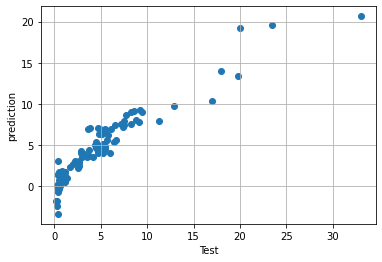

In [1405]:
plt.scatter(y_test,y_pred)
plt.grid()
plt.xlabel("Test")
plt.ylabel("prediction")

In [1406]:
##intercept :-9.87655809e+11
##coefficeints: year: 9.87655809e+11 - Present_Price:1.11975098e+00 -  Kms_Driven:-9.41162109e-02 -  Owner:-7.19299316e-02
   # Fuel_Type_Diesel:7.95440674e-02 -  Fuel_Type_Petrol:2.05841064e-02 -  Seller_Type_Individual:-3.31649780e-02 
    #Transmission_Manual:-3.86219025e-02
   # age:9.87655809e+11

In [1407]:
dfd=df

In [1408]:
#cross valiadtion K Fold
X = dfd.drop(['Selling_Price'],axis=1)
y=dfd['Selling_Price'].values.reshape(-1,1)

In [1409]:
X_train , X_test , y_train , y_test=train_test_split(X,y,test_size=0.2 , random_state=0)

In [1410]:
model=LinearRegression()
model.fit(X_train , y_train)

LinearRegression()

In [1411]:
result=model.score(X_test,y_test)
print(result)

0.914434297222852


In [1412]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [1413]:
model_new=LinearRegression()

In [1414]:
KFold_validation=KFold(5)

In [1415]:
results=cross_val_score(model_new,X,y,cv=KFold_validation)

In [1416]:
print(results)

[  0.87081422   0.78495686 -93.94826392   0.59365768   0.82692649]


In [1417]:
#cross valiadtion K Fold with 10 Folds
X = dfd.drop(['Selling_Price'],axis=1)
y=dfd['Selling_Price'].values.reshape(-1,1)

In [1418]:
X_train , X_test , y_train , y_test=train_test_split(X,y,test_size=0.2 , random_state=0)

In [1419]:
model=LinearRegression()
model.fit(X_train , y_train)

LinearRegression()

In [1420]:
result=model.score(X_test,y_test)
print(result)

0.914434297222852


In [1421]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [1422]:
model_new=LinearRegression()

In [1423]:
KFold_validation=KFold(10)

In [1424]:
results=cross_val_score(model_new,X,y,cv=KFold_validation)

In [1425]:
print(results)

[ 7.62072857e-01  8.94607515e-01  7.37101664e-01  8.67487566e-01
 -4.19768367e+01 -1.08369499e+03 -3.90266799e-01  7.65974671e-01
  8.22222198e-01  8.66789897e-01]


In [1426]:
bad_data=dfd.iloc[120:210].index


In [1427]:
df_removed_fold=dfd.drop(bad_data)

In [1428]:
df_removed_fold

,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,age
0,3.35,5.59,27000,0,0,1,0,1,5
1,4.75,9.54,43000,0,1,0,0,1,6
2,7.25,9.85,6900,0,0,1,0,1,2
3,2.85,4.15,5200,0,0,1,0,1,8
4,4.60,6.87,42450,0,1,0,0,1,5
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,1,0,0,1,3
297,4.00,5.90,60000,0,0,1,0,1,4
298,3.35,11.00,87934,0,0,1,0,1,10
299,11.50,12.50,9000,0,1,0,0,1,2


In [1429]:
#### Model4 on new data without that fold

In [1430]:
normf1=Scaler.fit_transform(df_removed_fold)
normf1_df=pd.DataFrame(normf1,columns=['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual', 'age'])
normf1_df

,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,age
0,0.086580,0.045943,0.131649,0.0,0.0,1.0,0.0,1.0,0.266667
1,0.126984,0.089254,0.213291,0.0,1.0,0.0,0.0,1.0,0.333333
2,0.199134,0.092654,0.029085,0.0,0.0,1.0,0.0,1.0,0.066667
3,0.072150,0.030154,0.020411,0.0,0.0,1.0,0.0,1.0,0.466667
4,0.122655,0.059978,0.210485,0.0,1.0,0.0,0.0,1.0,0.266667
...,...,...,...,...,...,...,...,...,...
206,0.264069,0.111842,0.167306,0.0,1.0,0.0,0.0,1.0,0.133333
207,0.105339,0.049342,0.300037,0.0,0.0,1.0,0.0,1.0,0.200000
208,0.086580,0.105263,0.442575,0.0,0.0,1.0,0.0,1.0,0.600000
209,0.321789,0.121711,0.039801,0.0,1.0,0.0,0.0,1.0,0.066667


In [1431]:
X =normf1_df.drop(['Selling_Price'],axis=1)
y=normf1_df['Selling_Price'].values.reshape(-1,1)

In [1432]:
X_train , X_test , y_train , y_test=train_test_split(X,y,test_size=0.2 , random_state=0)

In [1433]:
regressor=LinearRegression()
regressor.fit(X_train , y_train)

LinearRegression()

In [1434]:
y_pred= regressor.predict(X_test)

In [1435]:
print(regressor.intercept_)
print(regressor.coef_)

[0.18727052]
[[ 1.1378092  -0.17559924 -0.06162517  0.06838717 -0.0016251  -0.04566105
  -0.0575958  -0.19288317]]


Text(0, 0.5, 'prediction')

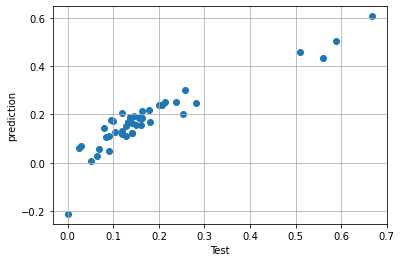

In [1436]:
plt.scatter(y_test,y_pred)
plt.grid()
plt.xlabel("Test")
plt.ylabel("prediction")

In [1437]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score:', metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 0.042626803208170846
Mean Squared Error: 0.0031135272880773563
Root Mean Squared Error: 0.055798990027395266
r2_score: 0.8497439477235702


In [1438]:
c=np.array(regressor.coef_)
print("unscaled regression coefs are:",c)

unscaled regression coefs are: [[ 1.1378092  -0.17559924 -0.06162517  0.06838717 -0.0016251  -0.04566105
  -0.0575958  -0.19288317]]


In [1439]:
#y_pred=
#m=np.array(y_pred)
#m=m.reshsape(-1,1)
#mm=Scaler.inverse_transform(m)
#mm


In [1440]:
###adding some new samples
df_new_inputs=pd.DataFrame({ "Present_Price":[5 , 6] , 
"Kms_Driven":[8000 , 9000] , "Owner":[0 ,1] , "Fuel_Type_Diesel":[1,0] , 
 "Fuel_Type_Petrol":[0 ,1] , "Seller_Type_Individual":[0 ,1] ,
"Transmission_Manual":[1,0],"age" :[11, 10],"Selling_Price":[5 , 6]})

In [1441]:
n1=Scaler.fit_transform(df_new_inputs)
dfn=pd.DataFrame(n1,columns=['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual', 'age'])
dfn

,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,age
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0


In [1442]:
X =df_removed_fold.drop(['Selling_Price'],axis=1)
y=df_removed_fold['Selling_Price'].values.reshape(-1,1)

In [1443]:
X_test=dfn.drop(['Selling_Price'],axis=1)

In [1444]:
regressor=LinearRegression()
regressor.fit(X_train , y_train)

LinearRegression()

In [1445]:
X_test

,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,age
0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0


In [1446]:
y_pred= regressor.predict(X_test)

In [1447]:
print(y_pred)

[[0.02238849]
 [1.02335938]]


In [1448]:

print(regressor.intercept_)
print(regressor.coef_)

[0.18727052]
[[ 1.1378092  -0.17559924 -0.06162517  0.06838717 -0.0016251  -0.04566105
  -0.0575958  -0.19288317]]


In [1449]:
Selling_Price= 0.18033755+(1.14303624*Present_Price)-(0.44435805*Kms_Driven)-(0.06118373*Owner) +(0.06789729*Fuel_Type_Diesel)
-(0.00161345*Fuel_Type_Petrol) -(0.04533397*Seller_Type_Individual)-(0.05718323*Transmission_Manual)-(0.19150149*age)
print(Selling_Price)

138.05007809999998


In [1450]:
#print(regressor.intercept_)
c=np.array(regressor.coef_)
print(c)

[[ 1.1378092  -0.17559924 -0.06162517  0.06838717 -0.0016251  -0.04566105
  -0.0575958  -0.19288317]]


In [1451]:
#### Model2 by adding dimension to "Present_Price"


In [1452]:
df.describe()
###No Negative values so we go for Degree=2

,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,age
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,4.661296,7.628472,36947.205980,0.043189,0.199336,0.794020,0.352159,0.867110,5.372093
std,5.082812,8.644115,38886.883882,0.247915,0.400166,0.405089,0.478439,0.340021,2.891554
min,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.900000,1.200000,15000.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.000000
50%,3.600000,6.400000,32000.000000,0.000000,0.000000,1.000000,0.000000,1.000000,5.000000
75%,6.000000,9.900000,48767.000000,0.000000,0.000000,1.000000,1.000000,1.000000,7.000000
max,35.000000,92.600000,500000.000000,3.000000,1.000000,1.000000,1.000000,1.000000,16.000000


In [1453]:
##Model Regression Degree=2
Present_Price2=df.Present_Price**2
df.insert(2 ,"Present_Price2" ,Present_Price2 )


In [1454]:
#building model degree 2
from sklearn import preprocessing
Scaler= preprocessing.MinMaxScaler(feature_range=(0,1))
n1=Scaler.fit_transform(df)
nn1=pd.DataFrame(n1,columns=['Selling_Price', 'Present_Price','Present_Price2', 'Kms_Driven' , 'Owner',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual', 'age']  )

In [1455]:
X = nn1.drop(['Selling_Price'],axis=1)
y=nn1['Selling_Price'].values.reshape(-1,1)

X_train , X_test , y_train , y_test=train_test_split(X,y,test_size=0.2 , random_state=0)

model_degree2=LinearRegression()
model_degree2.fit(X_train , y_train)

y_pred= model_degree2.predict(X_test)


In [1456]:
## Score And Errors 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score:', metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 0.029383517326499742
Mean Squared Error: 0.0016394356818349041
Root Mean Squared Error: 0.04048994544124385
r2_score: 0.9210023385478951


In [1457]:
#df.drop(['Kms_Driven3'],axis=1, inplace=True)
#df.drop(['age3'],axis=1, inplace=True)
#df.drop(['Present_Price3'],axis=1, inplace=True)
#df.drop(['Owner3'],axis=1, inplace=True)
#df.drop(['Fuel_Type_Diesel3'],axis=1, inplace=True)

In [1458]:
df.head()

,Selling_Price,Present_Price,Present_Price2,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,age
0,3.35,5.59,31.2481,27000,0,0,1,0,1,5
1,4.75,9.54,91.0116,43000,0,1,0,0,1,6
2,7.25,9.85,97.0225,6900,0,0,1,0,1,2
3,2.85,4.15,17.2225,5200,0,0,1,0,1,8
4,4.60,6.87,47.1969,42450,0,1,0,0,1,5


In [1459]:
#Model Regression Degree=2 by adding dimension to 'Present_Price', 'Kms_Driven', 'Owner', 'Fuel_Type_Diesel','age'

Kms_Driven2=df.Kms_Driven**2
df.insert(4 ,"Kms_Driven2" ,Kms_Driven2 )

Owner2=df.Owner**2 
df.insert(6 ,"Owner2" ,Owner2 )

Fuel_Type_Diesel2=df.Fuel_Type_Diesel**2
df.insert(8 ,"Fuel_Type_Diesel2" ,Fuel_Type_Diesel2 ) 

age2=df.age**2
df.insert(12 ,"age2" ,age2 ) 

In [1460]:
#building model degree 2
from sklearn import preprocessing
Scaler= preprocessing.MinMaxScaler(feature_range=(0,1))
mm=Scaler.fit_transform(df)
mmd=pd.DataFrame(mm,columns=['Selling_Price', 'Present_Price','Present_Price2', 'Kms_Driven','Kms_Driven2' , 'Owner','Owner2',
       'Fuel_Type_Diesel', 'Fuel_Type_Diesel2', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual', 'age','age2']  )

In [1461]:
X = mmd.drop(['Selling_Price'],axis=1)
y=mmd['Selling_Price'].values.reshape(-1,1)

X_train , X_test , y_train , y_test=train_test_split(X,y,test_size=0.2 , random_state=0)

model_degree2222=LinearRegression()
model_degree2222.fit(X_train , y_train)

y_pred= model_degree2222.predict(X_test)

In [1462]:
#Metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score model_degree2222:', metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 0.031012890949500067
Mean Squared Error: 0.0015213608113521554
Root Mean Squared Error: 0.03900462551226656
r2_score model_degree2222: 0.9266918808384212


In [1463]:
cc=np.array(model_degree2222.coef_)
print("scaled regression coefs are:",cc)

scaled regression coefs are: [[ 1.63415621e+00 -5.92903314e-01 -5.22719433e-01  5.29368303e-01
   2.35313840e-01 -4.35754519e-01  2.80452450e-02  2.80452450e-02
  -4.61168067e-04 -9.74283398e-03 -1.60521026e-02  2.38950667e-01
  -3.19257896e-01]]


In [1464]:
df.head()

,Selling_Price,Present_Price,Present_Price2,Kms_Driven,Kms_Driven2,Owner,Owner2,Fuel_Type_Diesel,Fuel_Type_Diesel2,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,age2,age
0,3.35,5.59,31.2481,27000,729000000,0,0,0,0,1,0,1,25,5
1,4.75,9.54,91.0116,43000,1849000000,0,0,1,1,0,0,1,36,6
2,7.25,9.85,97.0225,6900,47610000,0,0,0,0,1,0,1,4,2
3,2.85,4.15,17.2225,5200,27040000,0,0,0,0,1,0,1,64,8
4,4.60,6.87,47.1969,42450,1802002500,0,0,1,1,0,0,1,25,5


In [1465]:
#Model Regression Degree=3 first by adding dimension to 'Present_Price' only

In [1466]:
Present_Price3=df.Present_Price**3
df.insert(3 ,"Present_Price3" ,Present_Price3 )

In [1467]:
#building model degree 3
from sklearn import preprocessing
Scaler= preprocessing.MinMaxScaler(feature_range=(0,1))
my=Scaler.fit_transform(df)
myd=pd.DataFrame(my,columns=['Selling_Price', 'Present_Price','Present_Price2','Present_Price3' ,'Kms_Driven','Kms_Driven2' , 'Owner','Owner2',
       'Fuel_Type_Diesel', 'Fuel_Type_Diesel2', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual', 'age','age2']  )

In [1468]:
X = myd.drop(['Selling_Price'],axis=1)
y=myd['Selling_Price'].values.reshape(-1,1)

X_train , X_test , y_train , y_test=train_test_split(X,y,test_size=0.2 , random_state=0)

model_degree33=LinearRegression()
model_degree33.fit(X_train , y_train)

y_pred= model_degree33.predict(X_test)

In [1469]:
#Metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score model_degree33:', metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 0.03177629078681344
Mean Squared Error: 0.0016202328538078997
Root Mean Squared Error: 0.040252116140743456
r2_score model_degree33: 0.9219276438369092


In [1470]:
df.head()

,Selling_Price,Present_Price,Present_Price2,Present_Price3,Kms_Driven,Kms_Driven2,Owner,Owner2,Fuel_Type_Diesel,Fuel_Type_Diesel2,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,age2,age
0,3.35,5.59,31.2481,174.676879,27000,729000000,0,0,0,0,1,0,1,25,5
1,4.75,9.54,91.0116,868.250664,43000,1849000000,0,0,1,1,0,0,1,36,6
2,7.25,9.85,97.0225,955.671625,6900,47610000,0,0,0,0,1,0,1,4,2
3,2.85,4.15,17.2225,71.473375,5200,27040000,0,0,0,0,1,0,1,64,8
4,4.60,6.87,47.1969,324.242703,42450,1802002500,0,0,1,1,0,0,1,25,5


In [1471]:
#Model Regression Degree=3 by adding dimension to 'Present_Price', 'Kms_Driven', 'Owner', 'Fuel_Type_Diesel','age



Kms_Driven3=df.Kms_Driven**3
df.insert(6 ,"Kms_Driven3" ,Kms_Driven3 )

Owner3=df.Owner**3
df.insert(9 ,"Owner3" ,Owner3 )

Fuel_Type_Diesel3=df.Fuel_Type_Diesel**3
df.insert(12 ,"Fuel_Type_Diesel3" ,Fuel_Type_Diesel3 ) 

age3=df.age**3
df.insert(18 ,"age3" ,age3 ) 

In [1472]:
#building model degree 3
from sklearn import preprocessing
Scaler= preprocessing.MinMaxScaler(feature_range=(0,1))
mo=Scaler.fit_transform(df)
mod=pd.DataFrame(mo,columns=['Selling_Price', 'Present_Price','Present_Price2','Present_Price3', 'Kms_Driven','Kms_Driven2' ,'Kms_Driven3',
        'Owner','Owner2','Owner3','Fuel_Type_Diesel', 'Fuel_Type_Diesel2','Fuel_Type_Diesel3' ,'Fuel_Type_Petrol',
        'Seller_Type_Individual', 'Transmission_Manual', 'age','age2','age3']  )

In [1473]:
X = mod.drop(['Selling_Price'],axis=1)
y=mod['Selling_Price'].values.reshape(-1,1)

X_train , X_test , y_train , y_test=train_test_split(X,y,test_size=0.2 , random_state=0)

model_degree3=LinearRegression()
model_degree3.fit(X_train , y_train)

y_pred= model_degree3.predict(X_test)


In [1474]:
#Metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score model_degree2:', metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 0.03129999343289048
Mean Squared Error: 0.0016478004208906635
Root Mean Squared Error: 0.040593108046695116
r2_score model_degree2: 0.9205992761823606


In [1475]:
#Model Regression Degree=4 first by adding dimension to 'Present_Price' only
Present_Price4=df.Present_Price**4
df.insert( 4,"Present_Price4" ,Present_Price4)

In [1476]:
#building model degree 4
from sklearn import preprocessing
Scaler= preprocessing.MinMaxScaler(feature_range=(0,1))
mw=Scaler.fit_transform(df)
mwd=pd.DataFrame(mw,columns=['Selling_Price', 'Present_Price','Present_Price2','Present_Price3','Present_Price4', 'Kms_Driven','Kms_Driven2' ,'Kms_Driven3',
        'Owner','Owner2','Owner3','Fuel_Type_Diesel', 'Fuel_Type_Diesel2','Fuel_Type_Diesel3' ,'Fuel_Type_Petrol',
        'Seller_Type_Individual', 'Transmission_Manual', 'age','age2','age3 ']  )

In [1477]:
X = mwd.drop(['Selling_Price'],axis=1)
y=mwd['Selling_Price'].values.reshape(-1,1)

X_train , X_test , y_train , y_test=train_test_split(X,y,test_size=0.2 , random_state=0)

model_degree4=LinearRegression()
model_degree4.fit(X_train , y_train)

y_pred= model_degree4.predict(X_test)

In [1478]:
#Metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score model_degree2:', metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 0.03294347863326009
Mean Squared Error: 0.0020538995614336653
Root Mean Squared Error: 0.045319968683061394
r2_score model_degree2: 0.9010310291470753


In [1479]:
#cross valiadtion K Fold ondegree3 model with 10 Folds
df.drop(['Present_Price4'],axis=1, inplace=True)

X = df.drop(['Selling_Price'],axis=1)
y=df['Selling_Price'].values.reshape(-1,1)

In [1480]:
X_train , X_test , y_train , y_test=train_test_split(X,y,test_size=0.2 , random_state=0)

In [1481]:
modeldegree3=LinearRegression()
modeldegree3.fit(X_train , y_train)

LinearRegression()

In [1482]:
result=modeldegree3.score(X_test,y_test)
print(result)

0.9179108590977091


In [1483]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [1484]:
model3_new=LinearRegression()

In [1485]:
KFold_validation=KFold(10)

In [1486]:
results=cross_val_score(model_new,X,y,cv=KFold_validation)
print(results)

[ 8.42417288e-01  8.88877087e-01 -9.95695259e+01  8.52634101e-01
 -7.57144549e+01 -1.71579540e+03 -6.88470335e+02  7.91844585e-01
  8.25686497e-01  9.03233673e-01]


In [1487]:
bad_data1=df.iloc[40:60].index



In [1488]:
bad_data2=df.iloc[100:140].index

In [1489]:
df_removed1_fold=df.drop(bad_data1)
df_removed2_fold=df_removed1_fold.drop(bad_data2)


In [1490]:
df_removed2_fold

,Selling_Price,Present_Price,Present_Price2,Present_Price3,Kms_Driven,Kms_Driven2,Kms_Driven3,Owner,Owner2,Owner3,Fuel_Type_Diesel,Fuel_Type_Diesel2,Fuel_Type_Diesel3,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,age2,age,age3
0,3.35,5.59,31.2481,174.676879,27000,729000000,19683000000000,0,0,0,0,0,0,1,0,1,25,5,125
1,4.75,9.54,91.0116,868.250664,43000,1849000000,79507000000000,0,0,0,1,1,1,0,0,1,36,6,216
2,7.25,9.85,97.0225,955.671625,6900,47610000,328509000000,0,0,0,0,0,0,1,0,1,4,2,8
3,2.85,4.15,17.2225,71.473375,5200,27040000,140608000000,0,0,0,0,0,0,1,0,1,64,8,512
4,4.60,6.87,47.1969,324.242703,42450,1802002500,76495006125000,0,0,0,1,1,1,0,0,1,25,5,125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,134.5600,1560.896000,33988,1155184144,39262398686272,0,0,0,1,1,1,0,0,1,9,3,27
297,4.00,5.90,34.8100,205.379000,60000,3600000000,216000000000000,0,0,0,0,0,0,1,0,1,16,4,64
298,3.35,11.00,121.0000,1331.000000,87934,7732388356,679939837696504,0,0,0,0,0,0,1,0,1,100,10,1000
299,11.50,12.50,156.2500,1953.125000,9000,81000000,729000000000,0,0,0,1,1,1,0,0,1,4,2,8


In [1491]:
#### Model on new data without that folds


In [1492]:

nremov=Scaler.fit_transform(df_removed2_fold)
nremov_df=pd.DataFrame(nremov,columns=['Selling_Price', 'Present_Price','Present_Price2','Present_Price3', 'Kms_Driven','Kms_Driven2' ,'Kms_Driven3',
        'Owner','Owner2','Owner3','Fuel_Type_Diesel', 'Fuel_Type_Diesel2','Fuel_Type_Diesel3' ,'Fuel_Type_Petrol',
        'Seller_Type_Individual', 'Transmission_Manual', 'age','age2','age3' ])
nremov_df


,Selling_Price,Present_Price,Present_Price2,Present_Price3,Kms_Driven,Kms_Driven2,Kms_Driven3,Owner,Owner2,Owner3,Fuel_Type_Diesel,Fuel_Type_Diesel2,Fuel_Type_Diesel3,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,age,age2,age3
0,0.093123,0.057109,0.003632,0.000220,0.053053,0.002915,0.000157,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.094118,0.266667,0.030281
1,0.133238,0.099913,0.010602,0.001093,0.085085,0.007395,0.000636,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.137255,0.333333,0.052503
2,0.204871,0.103273,0.011303,0.001204,0.012813,0.000189,0.000003,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.011765,0.066667,0.001709
3,0.078797,0.041504,0.001997,0.000090,0.009409,0.000107,0.000001,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.247059,0.466667,0.124786
4,0.128940,0.070980,0.005492,0.000408,0.083984,0.007207,0.000612,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.094118,0.266667,0.030281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,0.269341,0.122237,0.015681,0.001966,0.067043,0.004620,0.000314,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.031373,0.133333,0.006349
237,0.111748,0.060468,0.004048,0.000259,0.119119,0.014399,0.001728,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.058824,0.200000,0.015385
238,0.093123,0.115735,0.014099,0.001676,0.175043,0.030929,0.005440,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.388235,0.600000,0.243956
239,0.326648,0.131990,0.018210,0.002460,0.017017,0.000323,0.000006,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.011765,0.066667,0.001709


In [1493]:
X =nremov_df.drop(['Selling_Price'],axis=1)
y=nremov_df['Selling_Price'].values.reshape(-1,1)

In [1494]:

X_train , X_test , y_train , y_test=train_test_split(X,y,test_size=0.2 , random_state=0)

In [1495]:
regressor=LinearRegression()
regressor.fit(X_train , y_train)

LinearRegression()

In [1496]:
y_pred= regressor.predict(X_test)

print(regressor.intercept_)
print(regressor.coef_)

[0.12689574]
[[ 1.17515211e+00  1.21366137e+00 -1.39236813e+00 -5.81740672e-01
   1.22862617e+00 -6.36447784e-01  1.03495425e-01 -1.13477173e-01
  -1.85801372e-01  1.59740071e-02  1.59740071e-02  1.59740071e-02
   1.33739271e-03 -1.94693396e-02  1.37556330e-04  2.85503319e-01
  -3.59173749e-01 -3.55484083e-02]]


In [1497]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score degree 3 after deleting Bad Data fold:', metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 0.035162167215411905
Mean Squared Error: 0.0028954429396421295
Root Mean Squared Error: 0.053809320193086714
r2_score degree 3 after deleting Bad Data fold: 0.8925435727400374


In [1498]:
##########################################################
#r2_score linear regression model : 0.9144342972228514
#r2_score model_degree2222 (one of degree2 models)  is: 0.9266918808384212
# r2_score .................
# I checked other models with more degrees and K fold evaluation but amonge all, I choosed first one 
#and in the function pred_val which is defined above i predict selling price by the DataFrame i made from user inputs